In [1]:
from collections import deque, defaultdict
import heapq

import networkx as nx
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

# Graph Search Algorithms
This notebook demonstrates some simple graph search algorithms, the goal is to find a path from node "a" to node "e". We walk through a couple of approaches to this starting with simple breadth first and depth first search then Dijkstra's algorithm and finally A*.

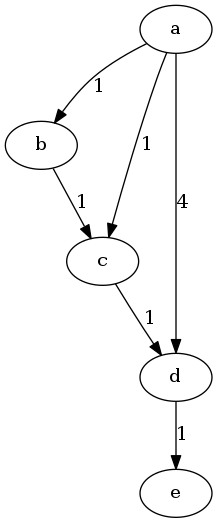

In [2]:
weighted_edges = [
    ('a', 'b', 1),
    ('b', 'c', 1),
    ('c', 'd', 1),
    ('d', 'e', 1),
    ('a', 'c', 1),
    ('a', 'd', 4)
]
g = nx.DiGraph()
for v1, v2, weight in weighted_edges:
    g.add_edge(v1, v2, weight=weight, label=str(weight))
nxpd.draw(g)

## Depth First
The depth first algorithm explores the graph recursively and discovers the path $A->B->C->D->E$

In [3]:
def depth_first(g, vs, ve, path=None):
    path = [vs] if path is None else path + [vs]
    if vs == ve:
        return path
    for child in g.adj[vs]:
        child_path = depth_first(g, child, ve, path)
        if child_path is not None:
            return child_path

In [4]:
list(depth_first(g, 'a', 'e'))

['a', 'b', 'c', 'd', 'e']

## Breadth First
The breadth first algorithm explores the graph using level-order traversal via a deque, it finds the path $A->D->E$ which is the shortest path in terms of number of edges traversed.

In [5]:
def breadth_first(g, vs, ve):
    visited = set()
    q = deque([(vs, (vs,))])
    while q:
        v1, p1 = q.popleft()
        if v1 not in visited:
            if v1 == ve:
                return p1
            visited.add(v1)
            q.extend([(v2, p1+(v2,)) for v2 in g.adj[v1]])

In [6]:
list(breadth_first(g, 'a', 'e'))

['a', 'd', 'e']

## Dijkstra's
Dijkstra's algorithm takes into account the edge weights and explores the minimum frontier of the graph at each step, finding the path with the minimum weight cost which is neither the longest (depth first) or shortest(breadth first) path. Dijkstra's algorithm requires six steps to find this path.

In [7]:
def dijkstra(g, vs, ve):
    steps = 0
    visited = set()
    heap = [(0, vs, (vs,))]
    while heap:
        steps += 1
        d1, v1, p1 = heapq.heappop(heap)
        if v1 not in visited:
            if v1 == ve:
                return p1, steps
            visited.add(v1)
            for v2 in g.adj[v1]:
                p2 = p1 + (v2,)
                d2 = d1 + g.get_edge_data(v1, v2)['weight']
                heapq.heappush(heap, (d2, v2, p2))

In [8]:
path, steps = dijkstra(g, 'a', 'e')
print(f'Found {path} in {steps} steps.')

Found ('a', 'c', 'd', 'e') in 6 steps.


## A*
The A* algorithm finds the same path as Dijkstra's algorithm, the minimum weighted path, but finds it in fewer steps (four instead of six) by taking into account a heuristic which is the minimum path length from each node to the goal node "E". Note that this minimum path always underestimates the weighted path length which is a requirement for the heuristic when using A*.

In [9]:
def astar(g, vs, ve, h):
    steps = 0
    visited = set()
    heap = [(0+h[vs], 0, vs, (vs,))]
    while heap:
        steps += 1
        f1, d1, v1, p1 = heapq.heappop(heap)
        if v1 not in visited:
            if v1 == ve:
                return p1, steps
            visited.add(v1)
            for v2 in g.adj[v1]:
                p2 = p1 + (v2,)
                d2 = d1 + g.get_edge_data(v1, v2)['weight']
                f2 = d2 + h[v2]
                heapq.heappush(heap, (f2, d2, v2, p2))

In [10]:
min_path_length_to_e = {
    'a': 2,
    'b': 4,
    'c': 3,
    'd': 1,
    'e': 0
}

In [11]:
path, steps = astar(g, 'a', 'e', min_path_length_to_e)
print(f'Found {path} in {steps} steps.')

Found ('a', 'c', 'd', 'e') in 4 steps.
